In [1]:
from __future__ import print_function

%matplotlib inline
import fluidsim

In [2]:
from fluidsim.solvers.ns2d.solver import Simul

In [3]:
params = Simul.create_default_params()

In [4]:
params.nu_2 = 1e-3
params.forcing.enable = False

params.init_fields.type = "noise"

params.output.periods_save.spatial_means = 1.0
params.output.periods_save.spectra = 1.0
params.output.periods_save.phys_fields = 2.0

In [5]:
simulation = Simul(params)

*************************************
Program fluidsim
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
/home/nikhil/Sim_data/NS2D_48x48_S8x8_2022-12-26_17-09-39
init_fields.type: noise

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns2d.output.spatial_m

In [7]:
[attr for attr in dir(simulation) if not attr.startswith("_")]

['InfoSolver',
 'Parameters',
 'compute_freq_diss',
 'create_default_params',
 'info',
 'info_solver',
 'init_fields',
 'is_forcing_enabled',
 'name_run',
 'oper',
 'output',
 'params',
 'plot_freq_diss',
 'preprocess',
 'state',
 'tendencies_nonlin',
 'time_stepping']

In [8]:
print(simulation.info.__class__)
print([attr for attr in dir(simulation.info) if not attr.startswith("_")])

<class 'fluiddyn.util.paramcontainer.ParamContainer'>
['params', 'solver']


In [10]:
simulation.info.solver is simulation.info_solver

True

In [12]:
simulation.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t0000.000.nc
    compute until t =         10
it =      0 ; t =            0 ; deltat  =   0.097144
              energy = 9.159e-02 ; Delta energy = +0.000e+00

MEMORY_USAGE:                  209.765625 Mo
it =     11 ; t =      1.09076 ; deltat  =    0.10203
              energy = 9.061e-02 ; Delta energy = -9.864e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  210.640625 Mo
it =     20 ; t =       2.0249 ; deltat  =     0.1043
              energy = 8.977e-02 ; Delta energy = -8.323e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  210.640625 Mo
save state_phys in file state_phys_t0002.025.nc
it =     30 ; t =      3.06543 ; deltat  =    0.10186
              energy = 8.886e-02 ; Delta energy = -9.103e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  210.640625 Mo
it =

In [14]:
[attr for attr in dir(simulation.output) if not attr.startswith("_")]

['SimReprMaker',
 'close_files',
 'compute_energy',
 'compute_energy_fft',
 'compute_enstrophy',
 'compute_enstrophy_fft',
 'end_of_simul',
 'figure_axe',
 'get_mean_values',
 'increments',
 'init_with_initialized_state',
 'init_with_oper_and_state',
 'name_run',
 'name_solver',
 'one_time_step',
 'oper',
 'params',
 'path_run',
 'phys_fields',
 'post_init',
 'print_size_in_Mo',
 'print_stdout',
 'sim',
 'spatial_means',
 'spatiotemporal_spectra',
 'spect_energy_budg',
 'spectra',
 'spectra_multidim',
 'sum_wavenumbers',
 'summary_simul',
 'temporal_spectra']

In [16]:
from fluidsim import load_sim_for_plot, load_state_phys_file

In [18]:
sim = load_state_phys_file(simulation.output.path_run)

*************************************
Program fluidsim
Load state from file:
[...]nikhil/Sim_data/NS2D_48x48_S8x8_2022-12-26_17-09-39/state_phys_t0010.010.nc
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
/home/nikhil/Sim_data/NS2D_48x48_S8x8_2022-12-26_17-09-39
init_fields.type: from_file

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.ph

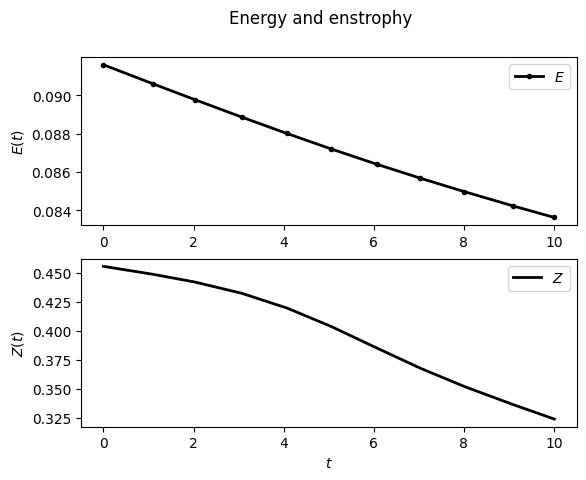

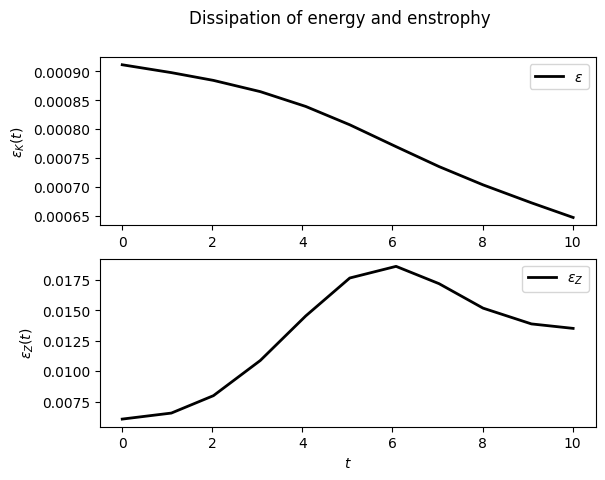

In [19]:
sim.output.spatial_means.plot()

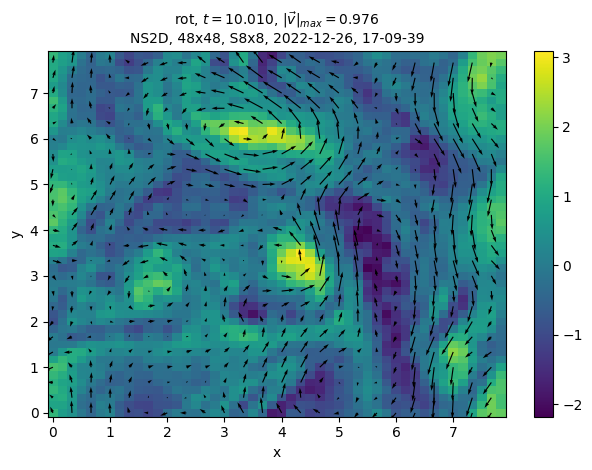

In [20]:
sim.output.phys_fields.plot()

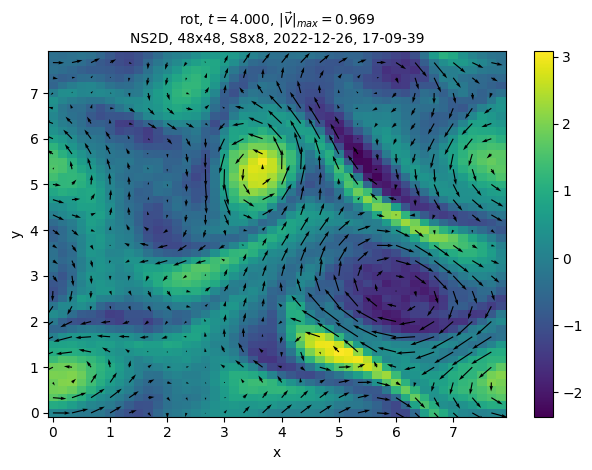

In [21]:
sim.output.phys_fields.plot(time=4)

In [23]:
import shutil
shutil.rmtree(sim.output.path_run)